### 背景

判断大法官是支持还是反对下级法院的判决。

自变量包括判决所来自的法院地区。使用logistic回归得到的回归系数有些难以解释，而CART所得到的分类结果具有很好的可解释性。

### 切分的个数

R中的`minbucket`用于控制切分（subset）中的观测值个数的下限。
- `minbucket`越小，切分越多。
- `minbucket`太小，过拟合。
- `minbucket`太大，模型过于简单。

### 用CART预测

在每个切分中，观测值可能包括多个结果（支持和反对）。
- 计算出每一类的占比。
- 设定阈值。
- 算出ROC曲线和AUC值。

In [1]:
stevens = read.csv("./data/stevens.csv")
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [2]:
library("caTools")

In [3]:
set.seed(3000)
split = sample.split(stevens$Reverse, SplitRatio=0.7)
train = subset(stevens, split==TRUE)
test = subset(stevens, split==FALSE)

In [4]:
install.packages("rpart", repos = "http://cran.us.r-project.org")

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpiQQfq3\downloaded_packages


In [4]:
library("rpart")

In [6]:
install.packages("rpart.plot", repos = "http://cran.us.r-project.org")

package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpiQQfq3\downloaded_packages


In [5]:
library(rpart.plot)

In [6]:
StevensTree = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, method="class", minbucket=25)

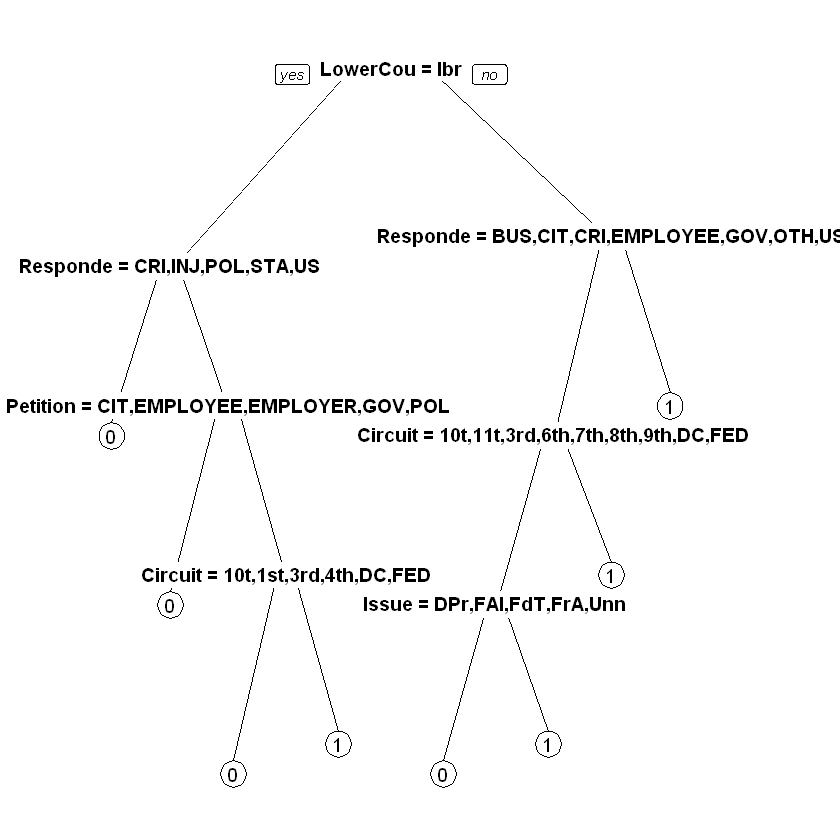

In [7]:
prp(StevensTree)

In [8]:
PredictCART = predict(StevensTree, newdata=test, type="class")

`accuracy`战胜基准模型（总预测`Reverse`），跟`logistics`的`accuracy`差不多，但可解释性更强。

In [9]:
table(test$Reverse, PredictCART)

   PredictCART
     0  1
  0 41 36
  1 22 71

模型在测试集上的预测结果。

In [10]:
library(ROCR)
PredictROC = predict(StevensTree, newdata=test)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [11]:
PredictROC

,0,1
1,0.3035714,0.6964286
3,0.3035714,0.6964286
4,0.4,0.6
6,0.4,0.6
8,0.4,0.6
21,0.3035714,0.6964286
32,0.5517241,0.4482759
36,0.5517241,0.4482759
40,0.3035714,0.6964286
42,0.5517241,0.4482759


测试集中的每个观测数据都被分到CART中的某个subset，每个subset中标记为1的数据与标记为0的数据的占比就是每行的两个数字。第二行数字可用于计算ROC。

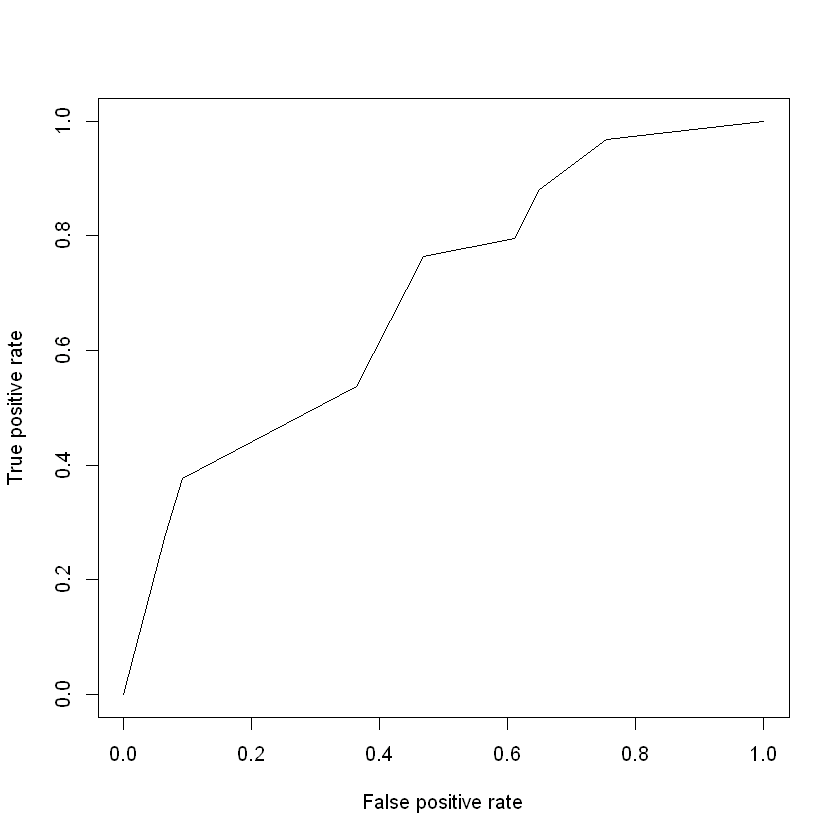

In [13]:
pred = prediction(PredictROC[,2], test$Reverse)
perf = performance(pred, "tpr", "fpr")
plot(perf)

### Quick Question

In [15]:
auc = as.numeric(performance(pred, "auc")@y.values)
auc

[1] 0.6927105

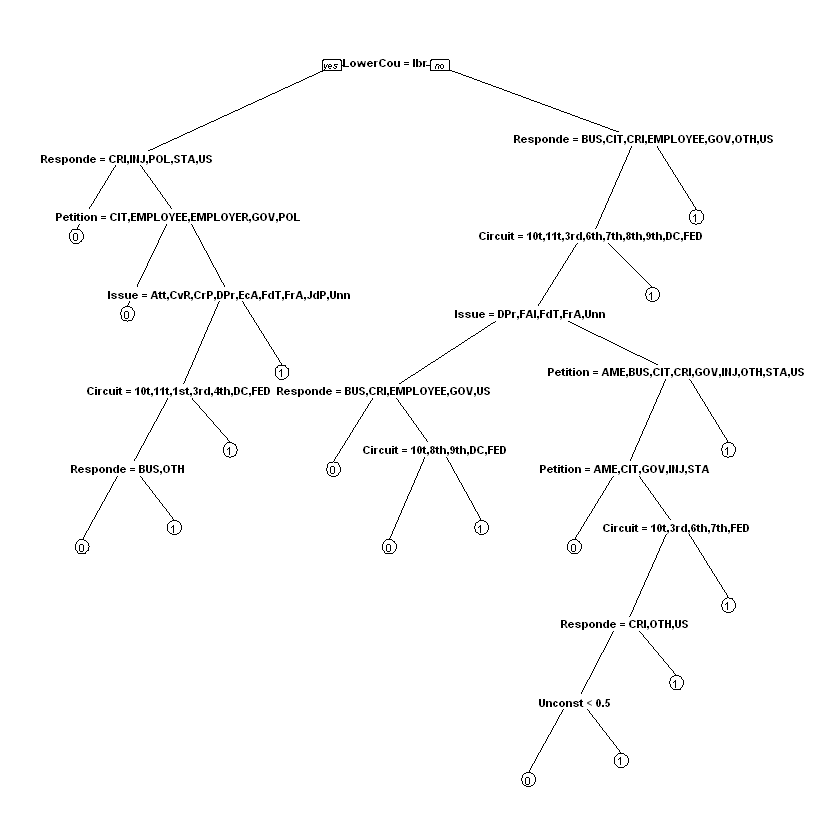

In [16]:
StevensTree2 = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, method="class", minbucket=5)
prp(StevensTree2)

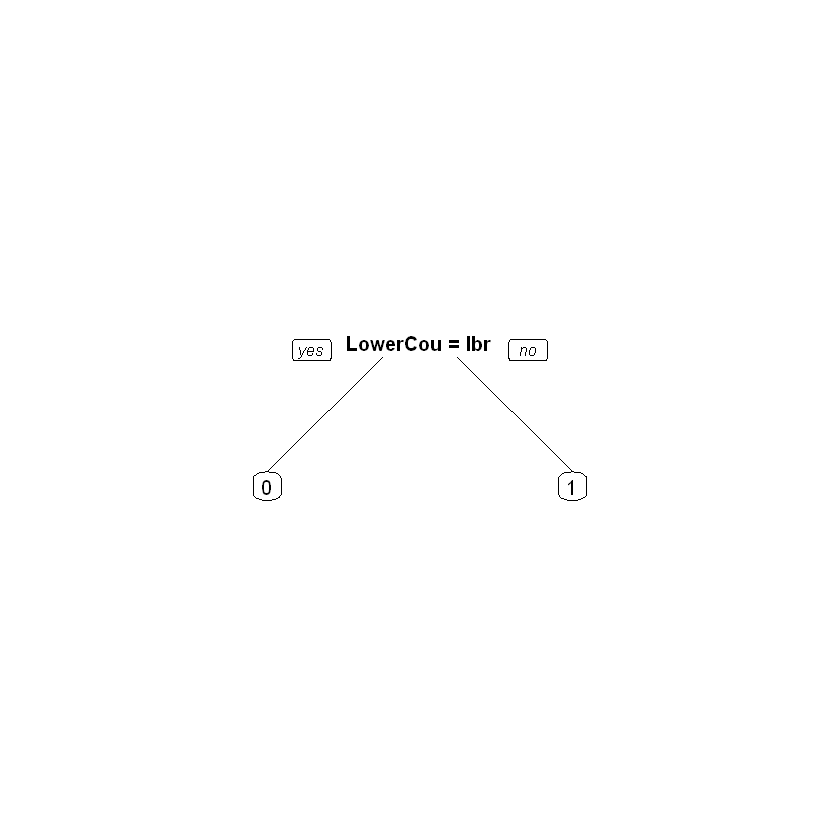

In [17]:
StevensTree3 = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, method="class", minbucket=100)
prp(StevensTree3)

### 随机森林

- 提高CART的`accuracy`
- 建立大量的CART，降低了可解释性
- 通过让每棵CART投票的方式决定新观测值的预测值

**如何建立大量的CART？**

- 自变量：所有自变量的随机子集
- 观测值：观测值的`bootstrapped`样本
    - 例如，原始数据1,2,3,4,5
    - 第一棵树的数据：2,4,5,2,1
    - 第二棵树的数据：3,5,1,5,2
    - ...
    
**随机森林的参数**

- 一个切分中的最小观测值个数：`nodesize`
- 树的个数：不能太小，因为`bootstrap`会“遗失”样本

In [18]:
install.packages("randomForest", repos = "http://cran.us.r-project.org")

package 'randomForest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpKuTjRl\downloaded_packages


In [19]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [20]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, nodesize=25, ntree=200)

Warning message:
In randomForest.default(m, y, ...): The response has five or fewer unique values.  Are you sure you want to do regression?

在CART中，通过`type=class`保证了是分类而非回归。在随机森林中，要用另外的方式保证。方法是，将`Reverse`的值类型转换为`factor`。

In [21]:
train$Reverse = as.factor(train$Reverse)
test$Reverse = as.factor(test$Reverse)

这回就不会报出警告信息了。

In [22]:
StevensForest = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, nodesize=25, ntree=200)

`accuracy`比CART提高了一点点。

In [23]:
PredictForest = predict(StevensForest, newdata=test)
table(test$Reverse, PredictForest)

   PredictForest
     0  1
  0 40 37
  1 19 74

### Quick Question

In [24]:
set.seed(100)
StevensForest2 = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, nodesize=25, ntree=200)
PredictForest2 = predict(StevensForest2, newdata=test)
table(test$Reverse, PredictForest2)

   PredictForest2
     0  1
  0 43 34
  1 19 74

In [25]:
(43+74)/(43+36+19+74)

[1] 0.6802326

In [26]:
set.seed(200)
StevensForest3 = randomForest(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, nodesize=25, ntree=200)
PredictForest3 = predict(StevensForest3, newdata=test)
table(test$Reverse, PredictForest3)

   PredictForest3
     0  1
  0 44 33
  1 17 76

In [27]:
(44+76)/(44+33+17+76)

[1] 0.7058824

### 参数选择

CART中，`minbucket`的取值会影响模型的样本外准确度。应该如何选择参数？

**k重交叉验证**

- 将训练集划分为k等分
- 用k-1个划分训练模型，在剩下的划分上测试。循环，得到k个模型
- 将k个模型的参数取平均

**Complexity Parameter**

在R中使用交叉验证时的参数，像调整R方或AIC，用于衡量模型复杂度和准确度之间的取舍关系。小的`cp`会导致一棵大树（过拟合）。

In [28]:
install.packages("caret", repos = "http://cran.us.r-project.org")

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpKuTjRl\downloaded_packages


In [29]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [30]:
install.packages("e1071", repos = "http://cran.us.r-project.org")

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CYS\AppData\Local\Temp\RtmpKuTjRl\downloaded_packages


In [31]:
library(e1071)

- numFolds决定k的取值？
- cp值取0.01至0.5的值，以0.01为一个跳

In [34]:
numFolds = trainControl(method="cv", number=10) 
cpGrid = expand.grid(.cp=seq(0.01, 0.5, 0.01,)) 

In [35]:
train(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, method="rpart", trControl=numFolds, tuneGrid=cpGrid)

CART 

396 samples
  8 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 357, 356, 357, 356, 356, 356, ... 
Resampling results across tuning parameters:

  cp    Accuracy   Kappa      
  0.01  0.6365385  0.252522710
  0.02  0.6337179  0.248281522
  0.03  0.6314103  0.251796733
  0.04  0.6314103  0.253786180
  0.05  0.6440385  0.282995035
  0.06  0.6440385  0.282995035
  0.07  0.6440385  0.282995035
  0.08  0.6440385  0.282995035
  0.09  0.6440385  0.282995035
  0.10  0.6440385  0.282995035
  0.11  0.6440385  0.282995035
  0.12  0.6440385  0.282995035
  0.13  0.6440385  0.282995035
  0.14  0.6440385  0.282995035
  0.15  0.6440385  0.282995035
  0.16  0.6440385  0.282995035
  0.17  0.6440385  0.282995035
  0.18  0.6440385  0.282995035
  0.19  0.6440385  0.282995035
  0.20  0.6085897  0.193703966
  0.21  0.5807692  0.121202966
  0.22  0.5605128  0.062732119
  0.23  0.5428846  0.003553299
  0.24  0.5428846  0.003553299
  0.2

In [36]:
StevensTreeCV = rpart(Reverse ~ Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst, data=train, method="class", cp=0.19)

In [37]:
PredictCV = predict(StevensTreeCV, newdata=test, type="class")

In [38]:
table(test$Reverse, PredictCV)

   PredictCV
     0  1
  0 59 18
  1 29 64

In [39]:
(59+64)/(59+18+29+64)

[1] 0.7235294

**随机森林无需用k重交叉验证进行参数选择？**

根据随机森林算法，它对参数不敏感，不容易对训练集过拟合。

### Quick Question

Sometimes the simplest models are the best!

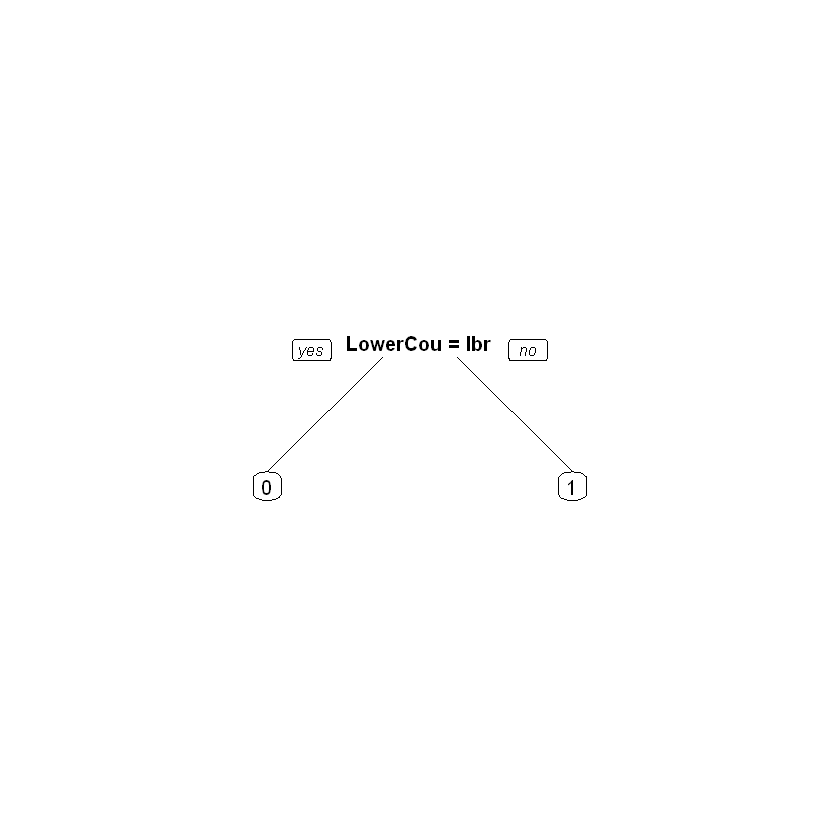

In [41]:
prp(StevensTreeCV)